In [42]:
import numpy as np
import torch.nn as nn
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [44]:
x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = 0.7 * x + 0.3
x.shape,y.shape,len(x), len(y), x[:5], y[:5]

(torch.Size([50, 1]),
 torch.Size([50, 1]),
 50,
 50,
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [45]:
x_train, y_train, x_test, y_test = x[:int(0.8*len(x))], y[:int(0.8*len(x))],x[int(0.8*len(x)):],y[int(0.8*len(x)):]
len(x_train), len(x_test), len(y_train), len(y_test), x_train.shape, y_train.shape

(40, 10, 40, 10, torch.Size([40, 1]), torch.Size([40, 1]))

In [46]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data = x_test,
                     test_label = y_test,
                     predictions = None):
    """Plots training data, test data and compared predictions."""

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
    plt.legend(prop={"size":14})

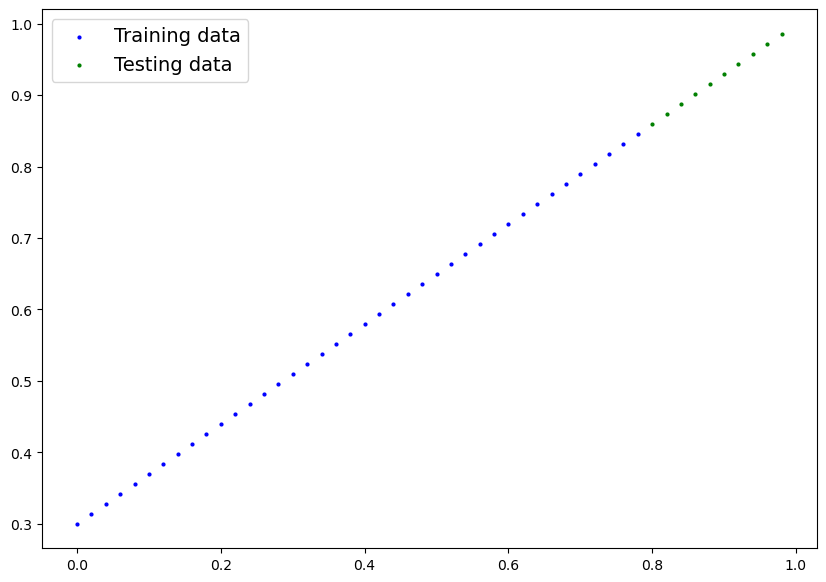

In [47]:
plot_predictions()

In [48]:
class Supervised_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features=1, out_features=10),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=10, out_features=50),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=50, out_features=1)
        )
    def forward(self, x):
        return self.seq(x)

In [49]:
model = Supervised_Model()
model

Supervised_Model(
  (seq): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=10, out_features=50, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [50]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001)


In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 4000
for epoch in range(epochs):
    model.train()

    y_pred = model(x_train)
    
    loss_train = loss_fn(y_pred, y_train)
    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_preds = model(x_test)
        loss_test = loss_fn(y_preds, y_test)
    
    if epoch % 1000 == 0:
        print(f"Epoch : {epoch} | Train loss : {loss_train} | Test loss : {loss_test}")

Epoch : 0 | Train loss : 0.7362002730369568 | Test loss : 1.293936014175415
Epoch : 1000 | Train loss : 0.07658848166465759 | Test loss : 0.2774948477745056
Epoch : 2000 | Train loss : 0.005795222707092762 | Test loss : 0.07866005599498749
Epoch : 3000 | Train loss : 0.003965836018323898 | Test loss : 0.05815841630101204


In [52]:
model.eval()
with torch.inference_mode():
    y_preds_new = model(x_test)

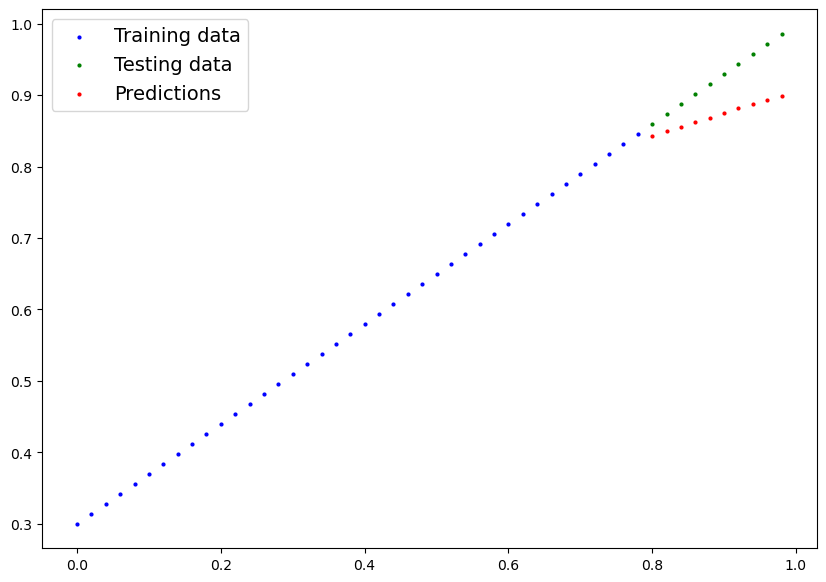

In [53]:
plot_predictions(predictions=y_preds_new)